<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" height=300 width=300 />


# Final Project: League of Legends Match Predictor 


In [1]:
%pip install pandas==2.2.2
%pip install numpy==1.26.4
%pip install matplotlib==3.8.0
%pip install scikit-learn==1.5.0
%pip install torch==2.3.1
%pip install ucimlrepo==0.0.7

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 107.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 100.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 43.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 98.5 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 97.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Introduction  

League of Legends, a popular multiplayer online battle arena (MOBA) game, generates extensive data from matches, providing an excellent opportunity to apply machine learning techniques to real-world scenarios. Perform the following steps to build a logistic regression model aimed at predicting the outcomes of League of Legends matches.  

Use the [league_of_legends_data_large.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv) file to perform the tasks.  

### Step 1: Data Loading and Preprocessing  

#### Task 1: Load the League of Legends dataset and preprocess it for training.  

Loading and preprocessing the dataset involves reading the data, splitting it into training and testing sets, and standardizing the features. You will utilize `pandas` for data manipulation, `train_test_split` from `sklearn` for data splitting, and `StandardScaler` for feature scaling.  

Loading and preprocessing the dataset involves reading the data, splitting it into training and testing sets, and standardizing the features.  

Please take responsibility for managing and installing all the required libraries for this lab on your own.

#### Exercise 1:  

Write a code to load the dataset, split it into training and testing sets, standardize the features, and convert the data into PyTorch tensors for use in training a PyTorch model.  


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
# Load the dataset
data = pd.read_csv('league_of_legends_data_large.csv')
# Preprocess the data
X = data.drop('win', axis=1)
y = data['win']
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)
print("Data loading, splitting, and standardization complete.")


Data loading, splitting, and standardization complete.


### Step 2: Logistic Regression Model  

#### Task 2: Implement a logistic regression model using PyTorch.  

Defining the logistic regression model involves specifying the input dimensions, the forward pass using the sigmoid activation function, and initializing the model, loss function, and optimizer.  

#### Exercise 2:  

Define the logistic regression model using PyTorch, specifying the input dimensions and the forward pass. Initialize the model, loss function, and optimizer.  


In [3]:
import torch.nn as nn
import torch.optim as optim

# Define the logistic regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
model = LogisticRegressionModel(input_dim)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

print("Model, loss function, and optimizer initialization complete.")

Model, loss function, and optimizer initialization complete.


### Step 3: Model Training  

#### Task 3: Train the logistic regression model on the dataset.  

The training loop will run for a specified number of epochs. In each epoch, the model makes predictions, calculates the loss, performs backpropagation, and updates the model parameters .  

#### Exercise 3:  

Write the code to train the logistic regression model on the dataset. Implement the training loop, making predictions, calculating the loss, performing backpropagation, and updating model parameters. Evaluate the model's accuracy on training and testing sets.  


In [4]:
# Training the model
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Model evaluation
model.eval()
with torch.no_grad():
    y_pred_train = model(X_train).detach()
    y_pred_test = model(X_test).detach()
    
train_accuracy = ((y_pred_train > 0.5) == y_train).float().mean()
test_accuracy = ((y_pred_test > 0.5) == y_test).float().mean()

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Epoch [100/1000], Loss: 0.7003
Epoch [200/1000], Loss: 0.6946
Epoch [300/1000], Loss: 0.6910
Epoch [400/1000], Loss: 0.6888
Epoch [500/1000], Loss: 0.6875
Epoch [600/1000], Loss: 0.6866
Epoch [700/1000], Loss: 0.6861
Epoch [800/1000], Loss: 0.6858
Epoch [900/1000], Loss: 0.6856
Epoch [1000/1000], Loss: 0.6855
Train Accuracy: 0.5537
Test Accuracy: 0.5100


### Step 4: Model Optimization and Evaluation  

#### Task 4: Implement optimization techniques and evaluate the model's performance.  

Optimization techniques such as L2 regularization (Ridge Regression) help in preventing overfitting. The model is retrained with these optimizations, and its performance is evaluated on both training and testing sets.  

#### Exercise 4:  

Implement optimization techniques like L2 regularization and retrain the model. Evaluate the performance of the optimized model on both training and testing sets.  


In [5]:
# Implementing L2 regularization (Ridge Regression)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)

# Retrain the model with L2 regularization
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate the optimized model
model.eval()
with torch.no_grad():
    y_pred_train = model(X_train).detach()
    y_pred_test = model(X_test).detach()
    
train_accuracy = ((y_pred_train > 0.5) == y_train).float().mean()
test_accuracy = ((y_pred_test > 0.5) == y_test).float().mean()

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Epoch [100/1000], Loss: 0.6854
Epoch [200/1000], Loss: 0.6853
Epoch [300/1000], Loss: 0.6853
Epoch [400/1000], Loss: 0.6853
Epoch [500/1000], Loss: 0.6853
Epoch [600/1000], Loss: 0.6853
Epoch [700/1000], Loss: 0.6853
Epoch [800/1000], Loss: 0.6853
Epoch [900/1000], Loss: 0.6853
Epoch [1000/1000], Loss: 0.6853
Train Accuracy: 0.5475
Test Accuracy: 0.5100


### Step 5: Visualization and Interpretation  

#### Task 5: Visualize the model's performance and interpret the results.  

Visualization tools like confusion matrices and ROC curves provide insights into the model's performance. The confusion matrix helps in understanding the classification accuracy, while the ROC curve illustrates the trade-off between sensitivity and specificity.  

#### Exercise 5:  

Write code to visualize the model's performance using confusion matrices and ROC curves. Generate classification reports to evaluate precision, recall, and F1-score. Retrain the model with L2 regularization and evaluate the performance.  


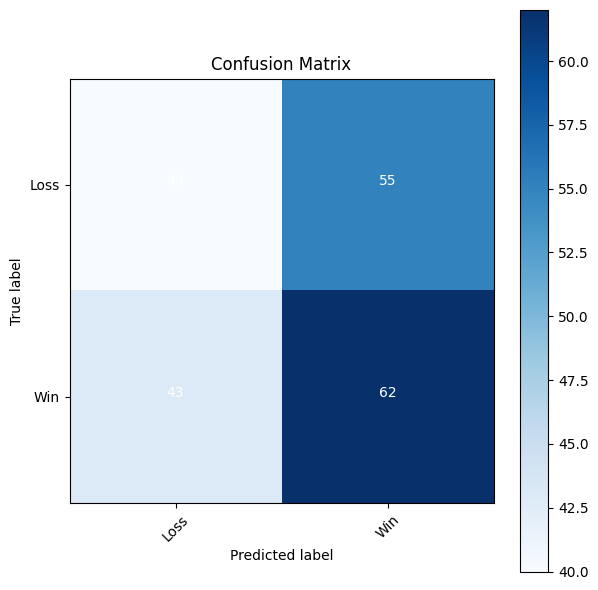

Classification Report:
               precision    recall  f1-score   support

        Loss       0.48      0.42      0.45        95
         Win       0.53      0.59      0.56       105

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.51       200



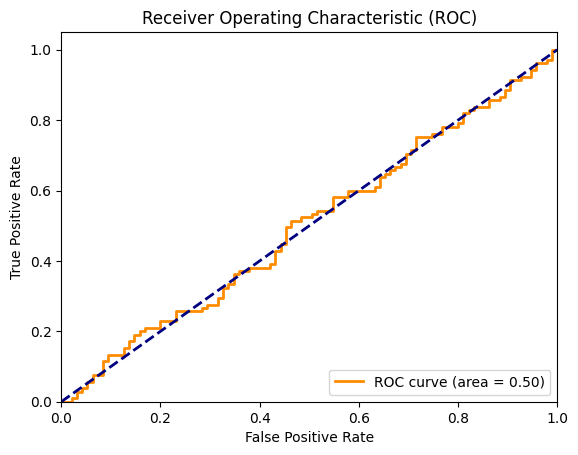

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import itertools

# Visualize the confusion matrix
y_pred_test_labels = (y_pred_test > 0.5).float()
cm = confusion_matrix(y_test, y_pred_test_labels)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(2)
plt.xticks(tick_marks, ['Loss', 'Win'], rotation=45)
plt.yticks(tick_marks, ['Loss', 'Win'])

thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_test_labels, target_names=['Loss', 'Win']))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Step 6: Model Saving and Loading  

#### Task 6: Save and load the trained model.  

This task demonstrates the techniques to persist a trained model using `torch.save` and reload it using `torch.load`. Evaluating the loaded model ensures that it retains its performance, making it practical for deployment in real-world applications.  

#### Exercise 6:  

Write code to save the trained model and reload it. Ensure the loaded model performs consistently by evaluating it on the test dataset.  


In [7]:
# Save the model
torch.save(model.state_dict(), 'logistic_regression_model.pth')

# Load the model
loaded_model = LogisticRegressionModel(input_dim)
loaded_model.load_state_dict(torch.load('logistic_regression_model.pth'))

# Ensure the loaded model is in evaluation mode
loaded_model.eval()

# Evaluate the loaded model
with torch.no_grad():
    y_pred_test_loaded = loaded_model(X_test).detach()
    loaded_test_accuracy = ((y_pred_test_loaded > 0.5) == y_test).float().mean()
    print(f'Loaded Model Test Accuracy: {loaded_test_accuracy:.4f}')



Loaded Model Test Accuracy: 0.5100


### Step 7: Hyperparameter Tuning  

#### Task 7: Perform hyperparameter tuning to find the best learning rate.  

By testing different learning rates, you will identify the optimal rate that provides the best test accuracy. This fine-tuning is crucial for enhancing model performance .  

#### Exercise 7:  

Perform hyperparameter tuning to find the best learning rate. Retrain the model for each learning rate and evaluate its performance to identify the optimal rate.  


In [8]:
learning_rates = [0.01, 0.05, 0.1]
best_accuracy = 0
best_lr = 0

for lr in learning_rates:
    # Reinitialize the model and optimizer for each learning rate
    model = LogisticRegressionModel(input_dim)
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    
    # Training the model
    epochs = 1000
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        
        if (epoch+1) % 100 == 0:
            print(f'Learning Rate: {lr}, Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    
    # Evaluate the model
    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test).detach()
        test_accuracy = ((y_pred_test > 0.5) == y_test).float().mean()
        print(f'Learning Rate: {lr}, Test Accuracy: {test_accuracy:.4f}')
                
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_lr = lr

print(f'Best Learning Rate: {best_lr}, Best Test Accuracy: {best_accuracy:.4f}')

Learning Rate: 0.01, Epoch [100/1000], Loss: 0.7336
Learning Rate: 0.01, Epoch [200/1000], Loss: 0.7141
Learning Rate: 0.01, Epoch [300/1000], Loss: 0.7023
Learning Rate: 0.01, Epoch [400/1000], Loss: 0.6953
Learning Rate: 0.01, Epoch [500/1000], Loss: 0.6912
Learning Rate: 0.01, Epoch [600/1000], Loss: 0.6888
Learning Rate: 0.01, Epoch [700/1000], Loss: 0.6874
Learning Rate: 0.01, Epoch [800/1000], Loss: 0.6865
Learning Rate: 0.01, Epoch [900/1000], Loss: 0.6860
Learning Rate: 0.01, Epoch [1000/1000], Loss: 0.6857
Learning Rate: 0.01, Test Accuracy: 0.5150
Learning Rate: 0.05, Epoch [100/1000], Loss: 0.6891
Learning Rate: 0.05, Epoch [200/1000], Loss: 0.6856
Learning Rate: 0.05, Epoch [300/1000], Loss: 0.6853
Learning Rate: 0.05, Epoch [400/1000], Loss: 0.6853
Learning Rate: 0.05, Epoch [500/1000], Loss: 0.6852
Learning Rate: 0.05, Epoch [600/1000], Loss: 0.6852
Learning Rate: 0.05, Epoch [700/1000], Loss: 0.6852
Learning Rate: 0.05, Epoch [800/1000], Loss: 0.6852
Learning Rate: 0.05,

### Step 8: Feature Importance  

#### Task 8: Evaluate feature importance to understand the impact of each feature on the prediction.  

The code to evaluate feature importance to understand the impact of each feature on the prediction.  

#### Exercise 8:  

Evaluate feature importance by extracting the weights of the linear layer and creating a DataFrame to display the importance of each feature. Visualize the feature importance using a bar plot.  


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'X' is your original DataFrame containing the features
feature_names = X.columns  # Get the feature names from the DataFrame

In [18]:
# Step 1: Extract the weights from the model
weights = model.linear.weight.detach().numpy().flatten()  # Flatten to 1D array

In [19]:
# Step 2: Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Weight': weights
})

In [20]:
# Step 3: Sort the DataFrame by the absolute weight values
importance_df['Absolute Weight'] = importance_df['Weight'].abs()
importance_df = importance_df.sort_values(by='Absolute Weight', ascending=False)

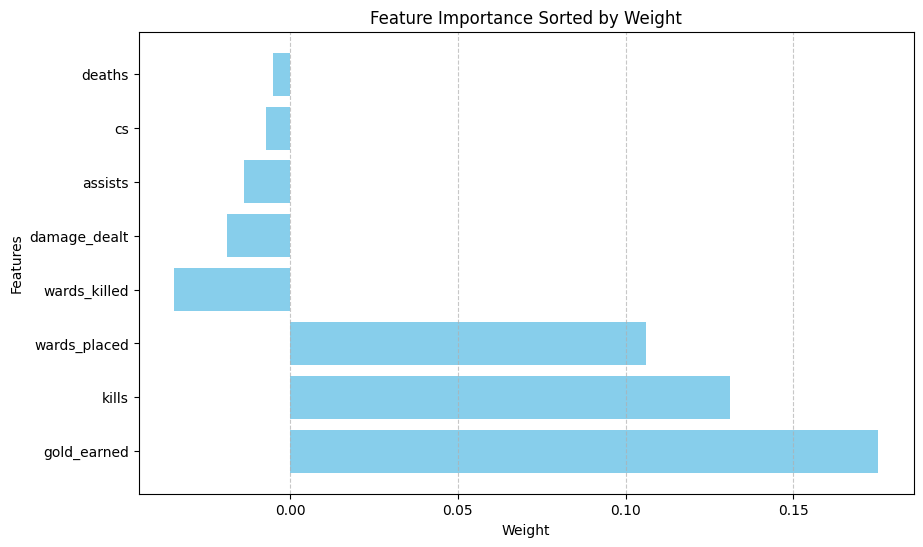

In [21]:
# Step 4: Visualize feature importance using a bar plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Weight'], color='skyblue')
plt.title('Feature Importance Sorted by Weight')
plt.xlabel('Weight')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#### Conclusion:  

Congratulations on completing the project! In this final project, you built a logistic regression model to predict the outcomes of League of Legends matches based on various in-game statistics. This comprehensive project involved several key steps, including data loading and preprocessing, model implementation, training, optimization, evaluation, visualization, model saving and loading, hyperparameter tuning, and feature importance analysis. This project provided hands-on experience with the complete workflow of developing a machine learning model for binary classification tasks using PyTorch.

© Copyright IBM Corporation. All rights reserved.
